#     **Predicting Medical Insurance Cost for an Insurance Company** <br>
<img src="images/instheme.png" width="850" height="500">

### **Overview** 
Insurance companies invests a lot of time, effort, and money in creating models that accurately predicts health care costs.
The data consists of age, sex, BMI(body mass index), children, smoker and region which are independent features and charge as a dependent feature. <br>
The purposes of this project is to look into different features to observe their relationship to predict individual medical costs billed by health insurance.<br>
The dataset used is from Kaggle.


Following the **CRISP-DM** framework for working through this data problem.

## Business Understanding

#### Business Objectives
The goal of this project is to build a Machine Learning model that can predict medical expenses for customers for an Insurance company and provide insights into the major factors that contribute to higher insurance costs.

This project could be boiled down to the following research question:

* **What contributes to a higher insurance cost?**
#### Business Success Criteria
The success criteria is the model's accuracy, measured by lower values of metrics like Root Mean Squared Error (RMSE) or Mean Absolute Error (MAE) and this achieve:
* **Improved pricing**: The model should enable the company to set more accurate and competitive premiums.
* **Enhanced Risk Assessment**: The model should provide clear insights into what factors are the most significant drivers of cost.

## Data Understanding

The dataset contains 2772 rows and 7 columns.
#### **Data Description:**
The columns of this dataset are:<br>

**Target variable to be predicted**:   Charges

**Insurance Features**:
1. Age
2. Sex
3. BMI (Body Mass Index)
4. Children
5. Smoker
6. Region



### **Exploratory Data Analysis (EDA)**
Here we explore the data to identify data quality issues and gain initial insights. Performing Exploratory Data Analysis (EDA), using summary statistics and data visualizations to uncover patterns and relationships.

In [5541]:
import warnings
warnings.filterwarnings('ignore')

import warnings
warnings.filterwarnings('ignore')

In [5543]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier

from statsmodels.robust.scale import mad
from sklearn.compose import ColumnTransformer
from datetime import date

from sklearn import set_config
import shap

set_config(display="diagram")

#### Cleaning the Data

Loading the data

In [5546]:
data = pd.read_csv('data/medical_insurance.csv')

In [5547]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Investigating the dataset for missing or problematic data.

In [5549]:
data.shape

(2772, 7)

The provided dataset contains 2772 entries and 7 features.

Checking for Duplicate entries.

In [5552]:
duplicate_count = data.duplicated().sum()
print("Number of duplicate rows: ", duplicate_count)

Number of duplicate rows:  1435


Dropping the duplicate entries.

In [5554]:
data = data.drop_duplicates()

In [5555]:
data.shape

(1337, 7)

Below is the concise summary of the dataframe

In [5557]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


Desciptive statistics of the data is given below:

In [5559]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


Checking for missing values

In [5561]:
#returns the total number of missing values per column
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no null or NaN or missing values in the data.

#### Analysing the data

##### **Univariate Analysis**

Below Histograms show the distribution of individual numerical features.

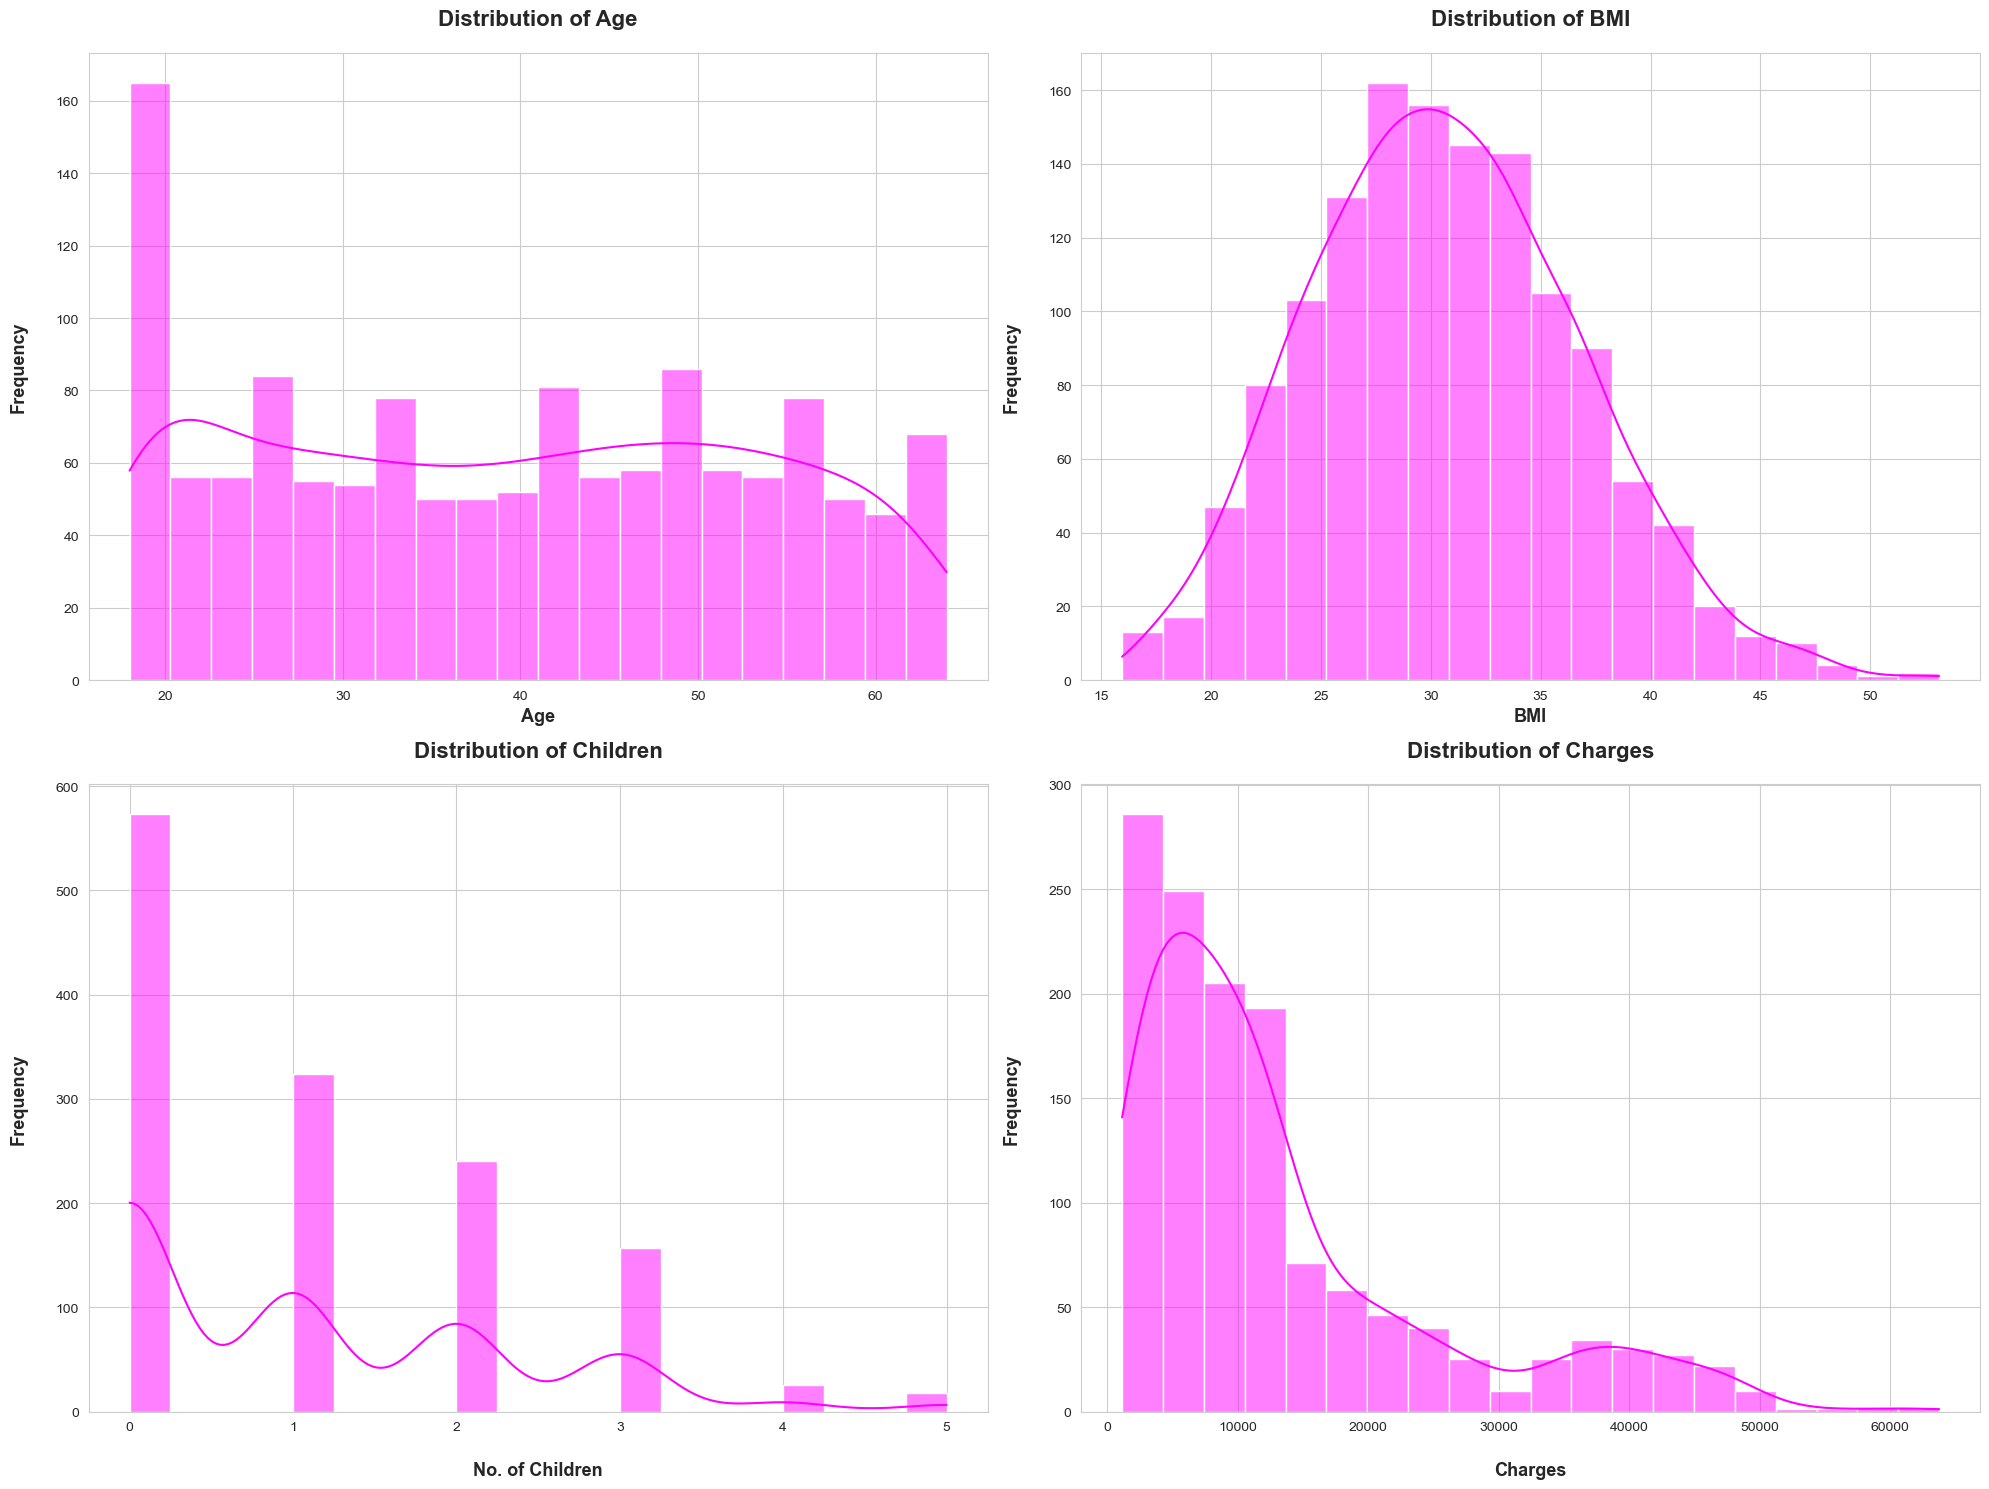

In [5566]:
# Distribution of Numerical Features
#['age', 'bmi', 'children', 'charges']
fig, axes = plt.subplots(2,2, figsize=(20, 15))

sns.histplot(data=data['age'], bins=20, kde=True, color='magenta', ax=axes[0][0])
axes[0][0].set_xlabel('Age', fontsize=13, fontweight='bold')
axes[0][0].set_ylabel('Frequency', labelpad=20, fontsize=13, fontweight='bold')
axes[0][0].set_title('Distribution of Age', pad=20, fontsize=16, fontweight='bold')
axes[0][0].grid(True)

sns.histplot(data=data['bmi'], bins=20, kde=True, color='magenta', ax=axes[0][1])
axes[0][1].set_xlabel('BMI', fontsize=13, fontweight='bold')
axes[0][1].set_ylabel('Frequency', labelpad=20, fontsize=13, fontweight='bold')
axes[0][1].set_title('Distribution of BMI', pad=20, fontsize=16, fontweight='bold')
axes[0][1].grid(True)

sns.histplot(data=data['children'], bins=20, kde=True, color='magenta', ax=axes[1][0])
axes[1][0].set_xlabel('No. of Children', labelpad=20, fontsize=13, fontweight='bold')
axes[1][0].set_ylabel('Frequency', labelpad=20, fontsize=13, fontweight='bold')
axes[1][0].set_title('Distribution of Children', pad=20, fontsize=16, fontweight='bold')
axes[1][0].grid(True)

sns.histplot(data=data['charges'], bins=20, kde=True, color='magenta', ax=axes[1][1])
axes[1][1].set_xlabel('Charges', labelpad=20, fontsize=13, fontweight='bold')
axes[1][1].set_ylabel('Frequency', labelpad=20, fontsize=13, fontweight='bold')
axes[1][1].set_title('Distribution of Charges', pad=20, fontsize=16, fontweight='bold')
axes[1][1].grid(True)
plt.tight_layout()
plt.show()

**Findings:**

1. **Age**: The distribution of age is quite varied.The average age of policy holders is 39 years. The data shows a wide range from a minimum of 18 to a maximum of 64 years.

2. **BMI**: The average BMI is around 30.6, which falls into the obese range (30.0 or higher) according to the WHO. The values range from 15.96 to 53.1
3. **Children**: The number of children per policyholder ranges from 0 to 5. The average number of children is 1 and a significant portion of the population has few to no children.

4. **Charges**: The average charges is 13,279.12. The standard deviation is very high, at 12,110.35 suggesting a large spread in costs. The minimum charge is 1,121.87 and the maximum is $63,770.42


The above plots show that **BMI** and **Charges** data contains outliers.

A violin plot & box plot of the **BMI** and **Charges** below clearly shows the outliers in the higher BMI and Charges range.

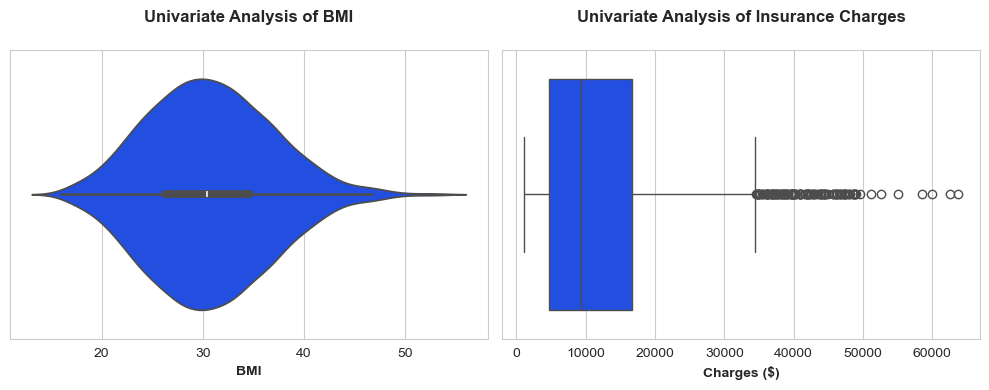

In [5570]:
#subplots for the categorical bivariate plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.set_style("whitegrid")
sns.violinplot(data= data, x='bmi', ax=axes[0], palette='bright')
axes[0].set_title('Univariate Analysis of BMI',pad=20, fontweight='bold', fontsize=12)
axes[0].set_xlabel('BMI', fontsize=10, fontweight='bold')

sns.boxplot(data=data, x='charges', ax=axes[1],palette='bright')
axes[1].set_title('Univariate Analysis of Insurance Charges',pad=20, fontweight='bold', fontsize=12)
axes[1].set_xlabel('Charges ($)', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

**Findings**:
1. From the Box plots above, its clear that `charges` has many outliers. These are all values that are greater than the upper bound of 34,472.84. The minimum charge outlier is 34,472.84, and the maximum is $63,770.43.
2. `bmi` has also some outliers that are greater than the upper bound of 46.75. The minimum BMI outlier is 46.75 and the maximum is 53.13

**Huber Loss inspired Outlier treatment**

This method uses the **Median Absolute Deviation (MAD)**, a robust measure of scale, to define the capping boundaries (Median±3×MAD). This approach is robust because the median and MAD are less affected by extreme outliers than the mean and standard deviation.

Applying Outlier treatment on the `charges` and bmi columns column in order to handle its outliers, for the purpose of EDA.<br>

Not using Huber Loss function which is used to minimize the impact of outliers during model training.

Here in our case, outliers removals can bias the model by discarding precisely the costly `charges` cases an insurer cares about or the `bmi` cases which are really important to be imcluded. So, capping only for EDA.

In [5575]:
# Define the Huber-Inspired Capping Function
# Values outside [Median - k*MAD, Median + k*MAD] are capped.
# k_factor (int/float): Multiplier for MAD to set the capping threshold.
def cap_outliers_huber_mad(df, column, k_factor=3):
    data_selected = df[column]
    data_median = data_selected.median()
    
    # Calculate MAD (a robust measure of scale)
    data_mad = mad(data_selected)
    
    if data_mad == 0:
        print(f"Skipping {column}: MAD is zero.")
        return df, 0, 0, 0, 0, 0

    # Define Outlier Threshold (k * MAD) and Capping Boundaries
    # This k*MAD threshold is conceptually similar to the 'delta' parameter 
    # in the Huber loss function.
    threshold = k_factor * data_mad
    lower_cap = data_median - threshold
    upper_cap = data_median + threshold
    
    # Calculate number of capped outliers
    outliers_upper = df[df[column] > upper_cap]
    outliers_lower = df[df[column] < lower_cap]
    num_outliers_capped = len(outliers_upper) + len(outliers_lower)
    
    # Perform Capping using .clip()
    # Values outside the range are set to the boundary (cap).
    df[f'{column}_capped'] = df[column].clip(lower=lower_cap, upper=upper_cap)

    return df, data_median, data_mad, lower_cap, upper_cap, num_outliers_capped

# Apply the Capping to Specified Columns
columns_to_treat = ['charges', 'bmi']
k_factor = 3  # A common robust choice

# Create a copy for modification
df_capped = data.copy()

# Apply the function to each column and collect metrics
results = {}
for column in columns_to_treat:
    df_capped, median, mad_val, lower, upper, count = cap_outliers_huber_mad(
        df_capped, column, k_factor
    )
    results[column] = {
        'Median': median,
        'MAD': mad_val,
        'Lower_Cap': lower,
        'Upper_Cap': upper,
        'Capped_Count': count,
        'Original_Max': df[column].max(),
        'Capped_Max': df_capped[f'{column}_capped'].max()
    }

# Print Results and Save Modified Data
print("\n--- Huber Loss-Inspired Capping Results ---")
for col, res in results.items():
    print(f"\nColumn: {col}")
    print(f"  Median: {res['Median']:.2f}")
    print(f"  MAD: {res['MAD']:.2f}")
    print(f"  Lower Cap: {res['Lower_Cap']:.2f}")
    print(f"  Upper Cap: {res['Upper_Cap']:.2f}")
    print(f"  Total Outliers Capped: {res['Capped_Count']}")


--- Huber Loss-Inspired Capping Results ---

Column: charges
  Median: 9386.16
  MAD: 7425.46
  Lower Cap: -12890.22
  Upper Cap: 31662.54
  Total Outliers Capped: 155

Column: bmi
  Median: 30.40
  MAD: 6.20
  Lower Cap: 11.81
  Upper Cap: 48.99
  Total Outliers Capped: 4


In [5576]:
df_capped.head()

,age,sex,bmi,children,smoker,region,charges,charges_capped,bmi_capped
0,19,female,27.900,0,yes,southwest,16884.92400,16884.92400,27.900
1,18,male,33.770,1,no,southeast,1725.55230,1725.55230,33.770
2,28,male,33.000,3,no,southeast,4449.46200,4449.46200,33.000
3,33,male,22.705,0,no,northwest,21984.47061,21984.47061,22.705
4,32,male,28.880,0,no,northwest,3866.85520,3866.85520,28.880


Below are the distribution plots of `charges` and `bmi` after Outlier treatment.

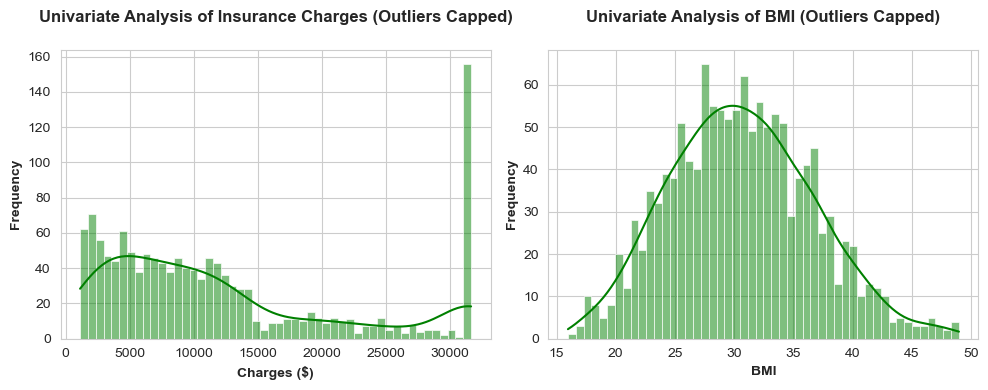

In [5578]:
#subplots for the outlier treated `charges` and `bmi`
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.set_style("whitegrid")
sns.histplot(data = df_capped['charges_capped'], kde=True, bins=50, color='green', ax=axes[0])
axes[0].set_title('Univariate Analysis of Insurance Charges (Outliers Capped)',pad=20, fontweight='bold', fontsize=12)
axes[0].set_xlabel('Charges ($)', fontsize=10, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=10, fontweight='bold')

sns.histplot(data = df_capped['bmi_capped'], kde=True, bins=50, color='green', ax=axes[1])
axes[1].set_title('Univariate Analysis of BMI (Outliers Capped)',pad=20, fontweight='bold', fontsize=12)
axes[1].set_xlabel('BMI', fontsize=10, fontweight='bold')
axes[1].set_ylabel('Frequency', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

Shown below is the descriptive statistics of the data after cleaning up.

In [5580]:
df_capped.describe()

,age,bmi,children,charges,charges_capped,bmi_capped
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487,12170.582848,30.656584
std,14.044333,6.100468,1.205571,12110.359656,9488.483864,6.077813
min,18.000000,15.960000,0.000000,1121.873900,1121.873900,15.960000
25%,27.000000,26.290000,0.000000,4746.344000,4746.344000,26.290000
50%,39.000000,30.400000,1.000000,9386.161300,9386.161300,30.400000
75%,51.000000,34.700000,2.000000,16657.717450,16657.717450,34.700000
max,64.000000,53.130000,5.000000,63770.428010,31662.541031,48.991832


Below Countplots show the distribution of individual categorical features `sex`, `smoker` and `region`

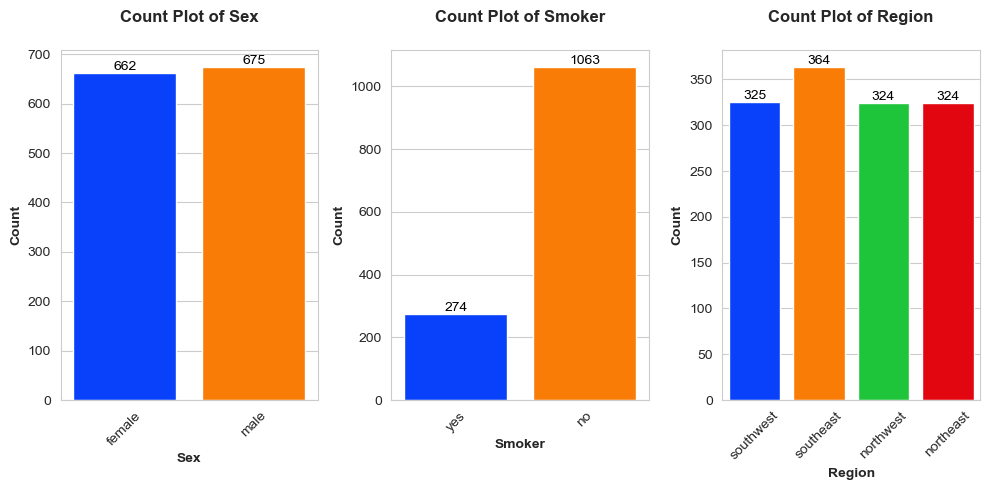

In [5582]:
# Define a list of manageable categorical columns for count plots
manageable_categorical_columns = ['sex', 'smoker', 'region']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
axes = axes.ravel()

# Loop through each categorical column
for i, column in enumerate(manageable_categorical_columns):
    sns.countplot(x=data[column], data=data, palette='bright', ax=axes[i], saturation=0.95)

    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)

    axes[i].set_title(f'Count Plot of {column.capitalize()}', pad=20, fontweight='bold')
    axes[i].set_xlabel(column.capitalize(),fontweight='bold')
    axes[i].set_ylabel('Count',fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout and save plots
plt.tight_layout()
plt.savefig('categorical_count_plots.png')

**Findings**:<br>
1. **Sex**: The number of males and females is almost balanced, with 675 males and 662 females.
2. **Smoker**: The majority of the individuals are non-smokers (1063), while there are 274 smokers.
3. **Region**: The data is around evenly distributed across the four regions, with the southeast having the highest count at 364 individuals, followed by the southwest (325), northwest (324), and northeast (324).

**Actionable Insights from Univariate Analysis:**<br>
1. **Charges**: The insurance company should focus on risk management for high-cost individuals. Since a small portion of the policyholders accounts for a disproportionately large share of the total medical costs, developing targeted programs for those groups could significantly reduce overall payout.
2. **Age**: The age distribution of policyholders is fairly even. So the compoany's marketing strategies must be appealing to all age groups.
3. **BMI**: The average BMI is approximately 30, which falls into the obese category. The data also has outliers with extremely high BMI values.
        This indicates a potential public health concern within the customer base. The insurance company could introduce wellness programs           or rewards to encourage healthy habits among policyholders.
4. **Smoker**: Around 20% of policyholders are smokers which could lead them to serious health issues. The company could design policies with higher premiums for smokers to accurately reflect their higher risk profile. Additionally, offering smoking cessation programs could be a strong value-add for customers.
5. **Region**: The customer base is fairly evenly distributed across the four geographical regions. There's no single dominant region. The company can develop region-specific strategies,for example, a region with a higher average BMI might be targeted with specific wellness programs.
6. **Children**: The majority of policyholders do not have children, while a smaller portion has one or two children. The maximum number of children is five. The company can develop personalized product recommendations based on a policyholder's family structure.
7. **Sex**: There is a nearly equal distribution of male and female policyholders, with males making up slightly more of the total population
            There could be some strategies developed if there is any difference in average charges among males and females.



##### **Bivariate Analysis:**

Here we will explore relationships between `charges` and other independant variables and identify the possible predictors of insurance costs.

Below scatter plots show the **relationships of numercial features** `age`, `bmi`, and `children` **with `charges`**

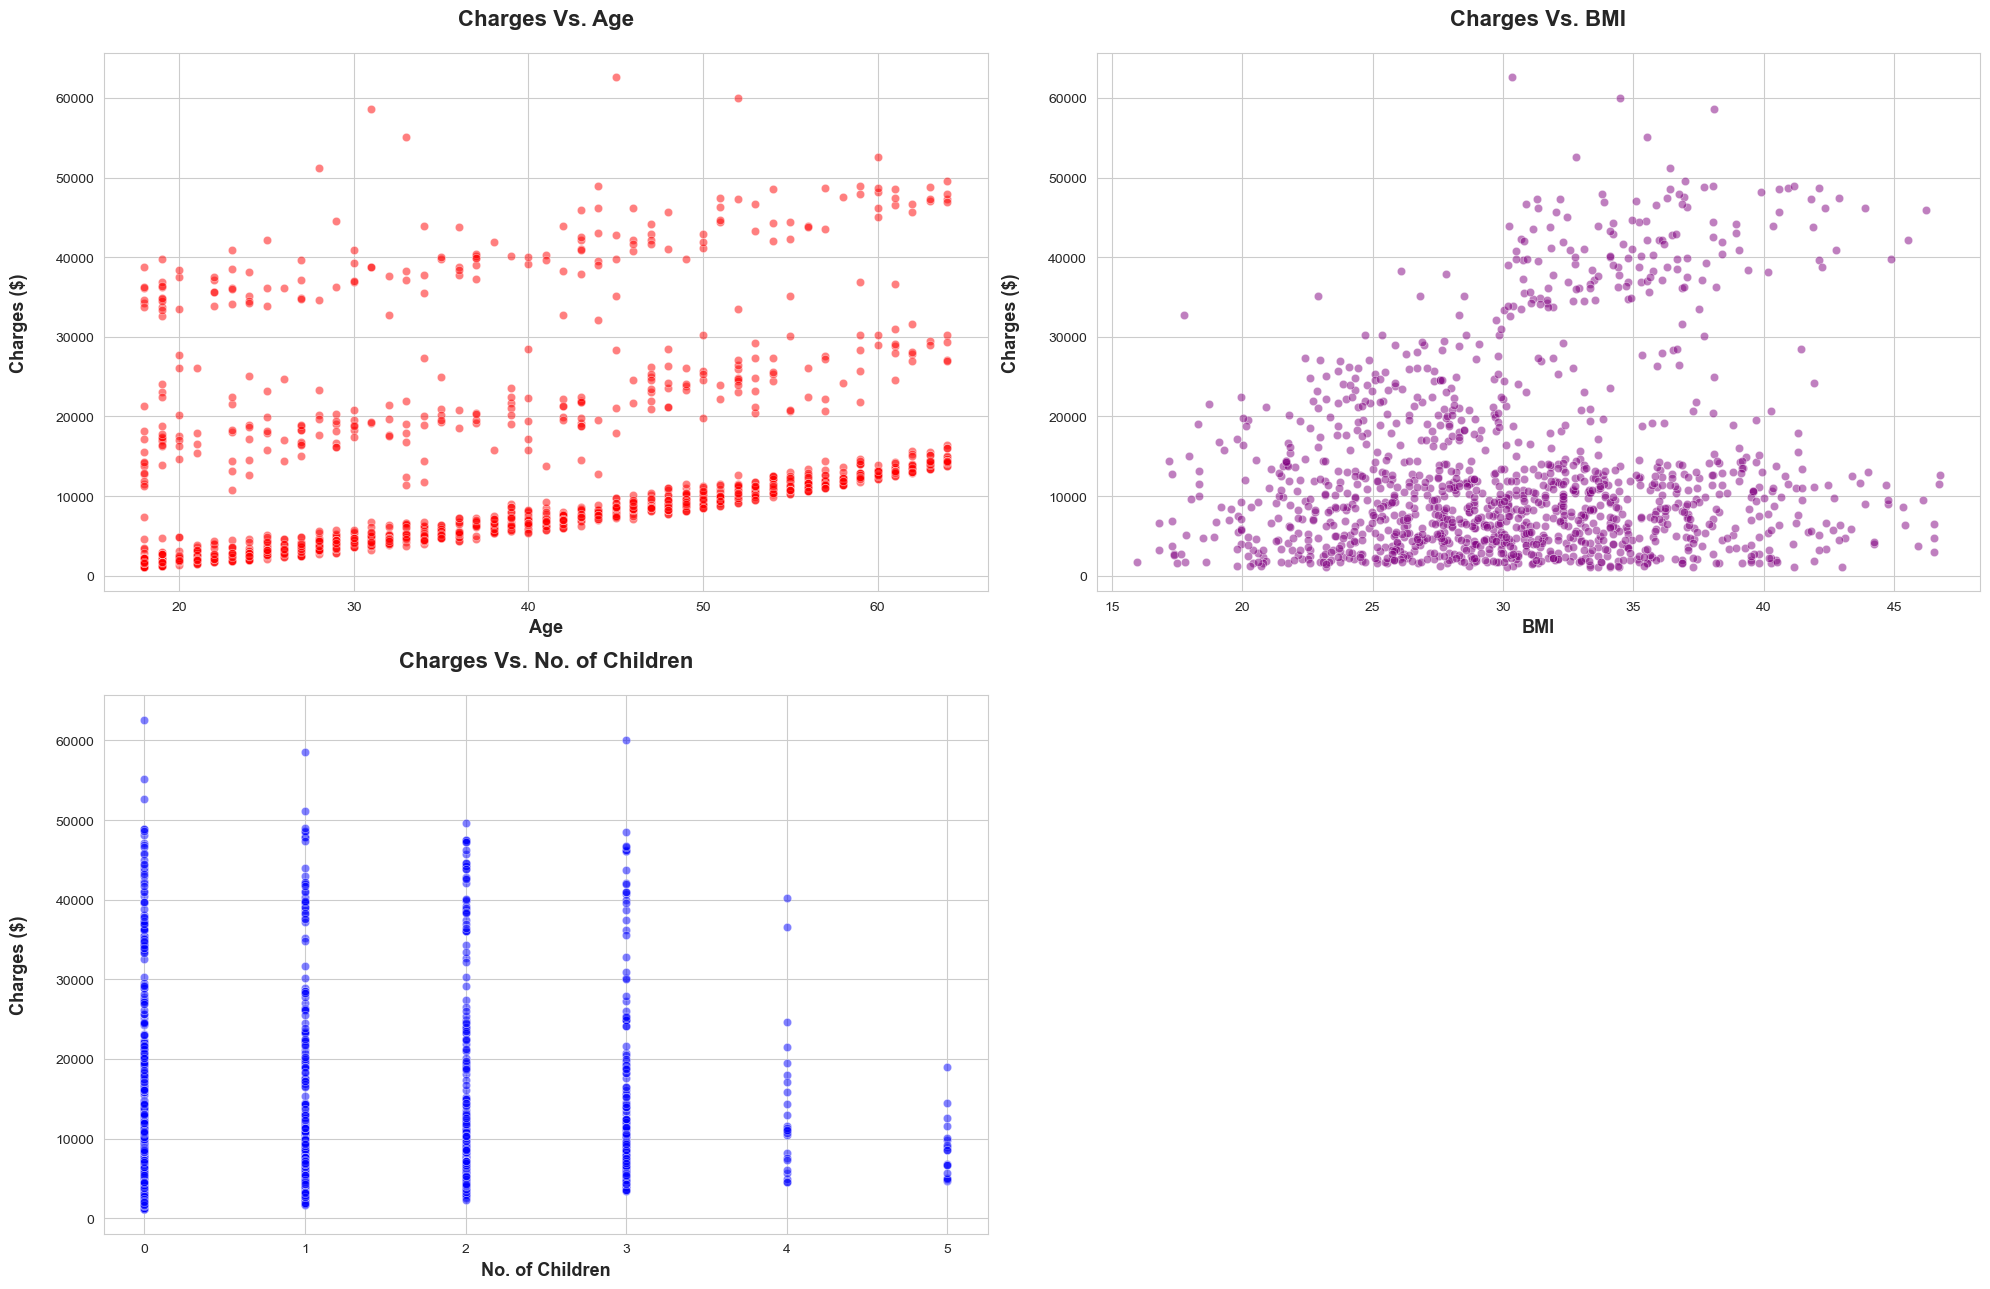

In [5588]:
#subplots for the numercial scatter plots
fig, axes = plt.subplots(2, 2, figsize=(20, 13))
sns.set_style("whitegrid")
sns.scatterplot(x='age', y='charges', data=data_no_outliers, ax=axes[0][0], alpha=0.5, color='red')
axes[0][0].set_title('Charges Vs. Age',pad=20, fontweight='bold', fontsize=16)
axes[0][0].set_xlabel('Age', fontsize=13, fontweight='bold')
axes[0][0].set_ylabel('Charges ($)', labelpad=20, fontsize=13, fontweight='bold')

sns.scatterplot(x='bmi', y='charges', data=data_no_outliers, ax=axes[0][1], alpha=0.5, color='purple')
axes[0][1].set_title('Charges Vs. BMI',pad=20, fontweight='bold', fontsize=16)
axes[0][1].set_xlabel('BMI', fontsize=13, fontweight='bold')
axes[0][1].set_ylabel('Charges ($)', labelpad=20, fontsize=13, fontweight='bold')

sns.scatterplot(x='children', y='charges', data=data_no_outliers, ax=axes[1][0], alpha=0.5, color='blue')
axes[1][0].set_title('Charges Vs. No. of Children',pad=20, fontweight='bold', fontsize=16)
axes[1][0].set_xlabel('No. of Children', fontsize=13, fontweight='bold')
axes[1][0].set_ylabel('Charges ($)', labelpad=20, fontsize=13, fontweight='bold')

fig.delaxes(axes[1, 1])
plt.tight_layout()
plt.show()

**Findings:** <br>
1. **Charges vs. Age**: There is a clear positive correlation between age and charges. As people get older, their medical costs tend to increase.The data points appear to be grouped into distinct bands, which may suggest that other factors are having a significant impact at different age groups.
2. **Charges Vs. BMI**: There appears to be a positive correlation between BMI and charges. Individuals with higher BMI values tend to have higher charges.
3. **Charges Vs. No. of Children**: The plot shows that there is no strong relationship between the number of children and the charges. The data points are widely scattered across the plot. There is no clear trend indicating that an increase in the number of children leads to a consistent increase in medical costs.


Below is the correlation map of all the numerical features with `charges`

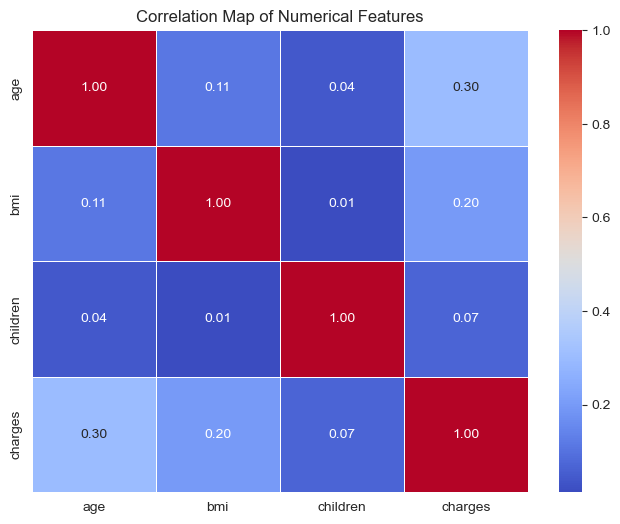

In [5591]:
correlation_matrix = data.select_dtypes(include=['number']).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Map of Numerical Features')
plt.show()

**Findings:**<br>
1. **Age and Charges**: The heatmap shows a positive correlation of 0.30 between age and charges. This is expected, as medical costs tend to rise with age.
2. **BMI and Charges**: There is also a positive correlation of 0.19 between bmi and charges, indicating that higher BMI is generally associated with higher medical charges.
3. **Children and Charges**: The correlation between children and charges is very weak, with a value of 0.07. This suggests that the number of children is not a strong predictor of medical charges.
4. **Age and BMI**: The relationship between age and bmi is very weak, with a correlation of 0.11. This indicates that a person's age is not a good predictor of their BMI.


Below bivariate plots show the **relationship of Categorical features with the Charges**.

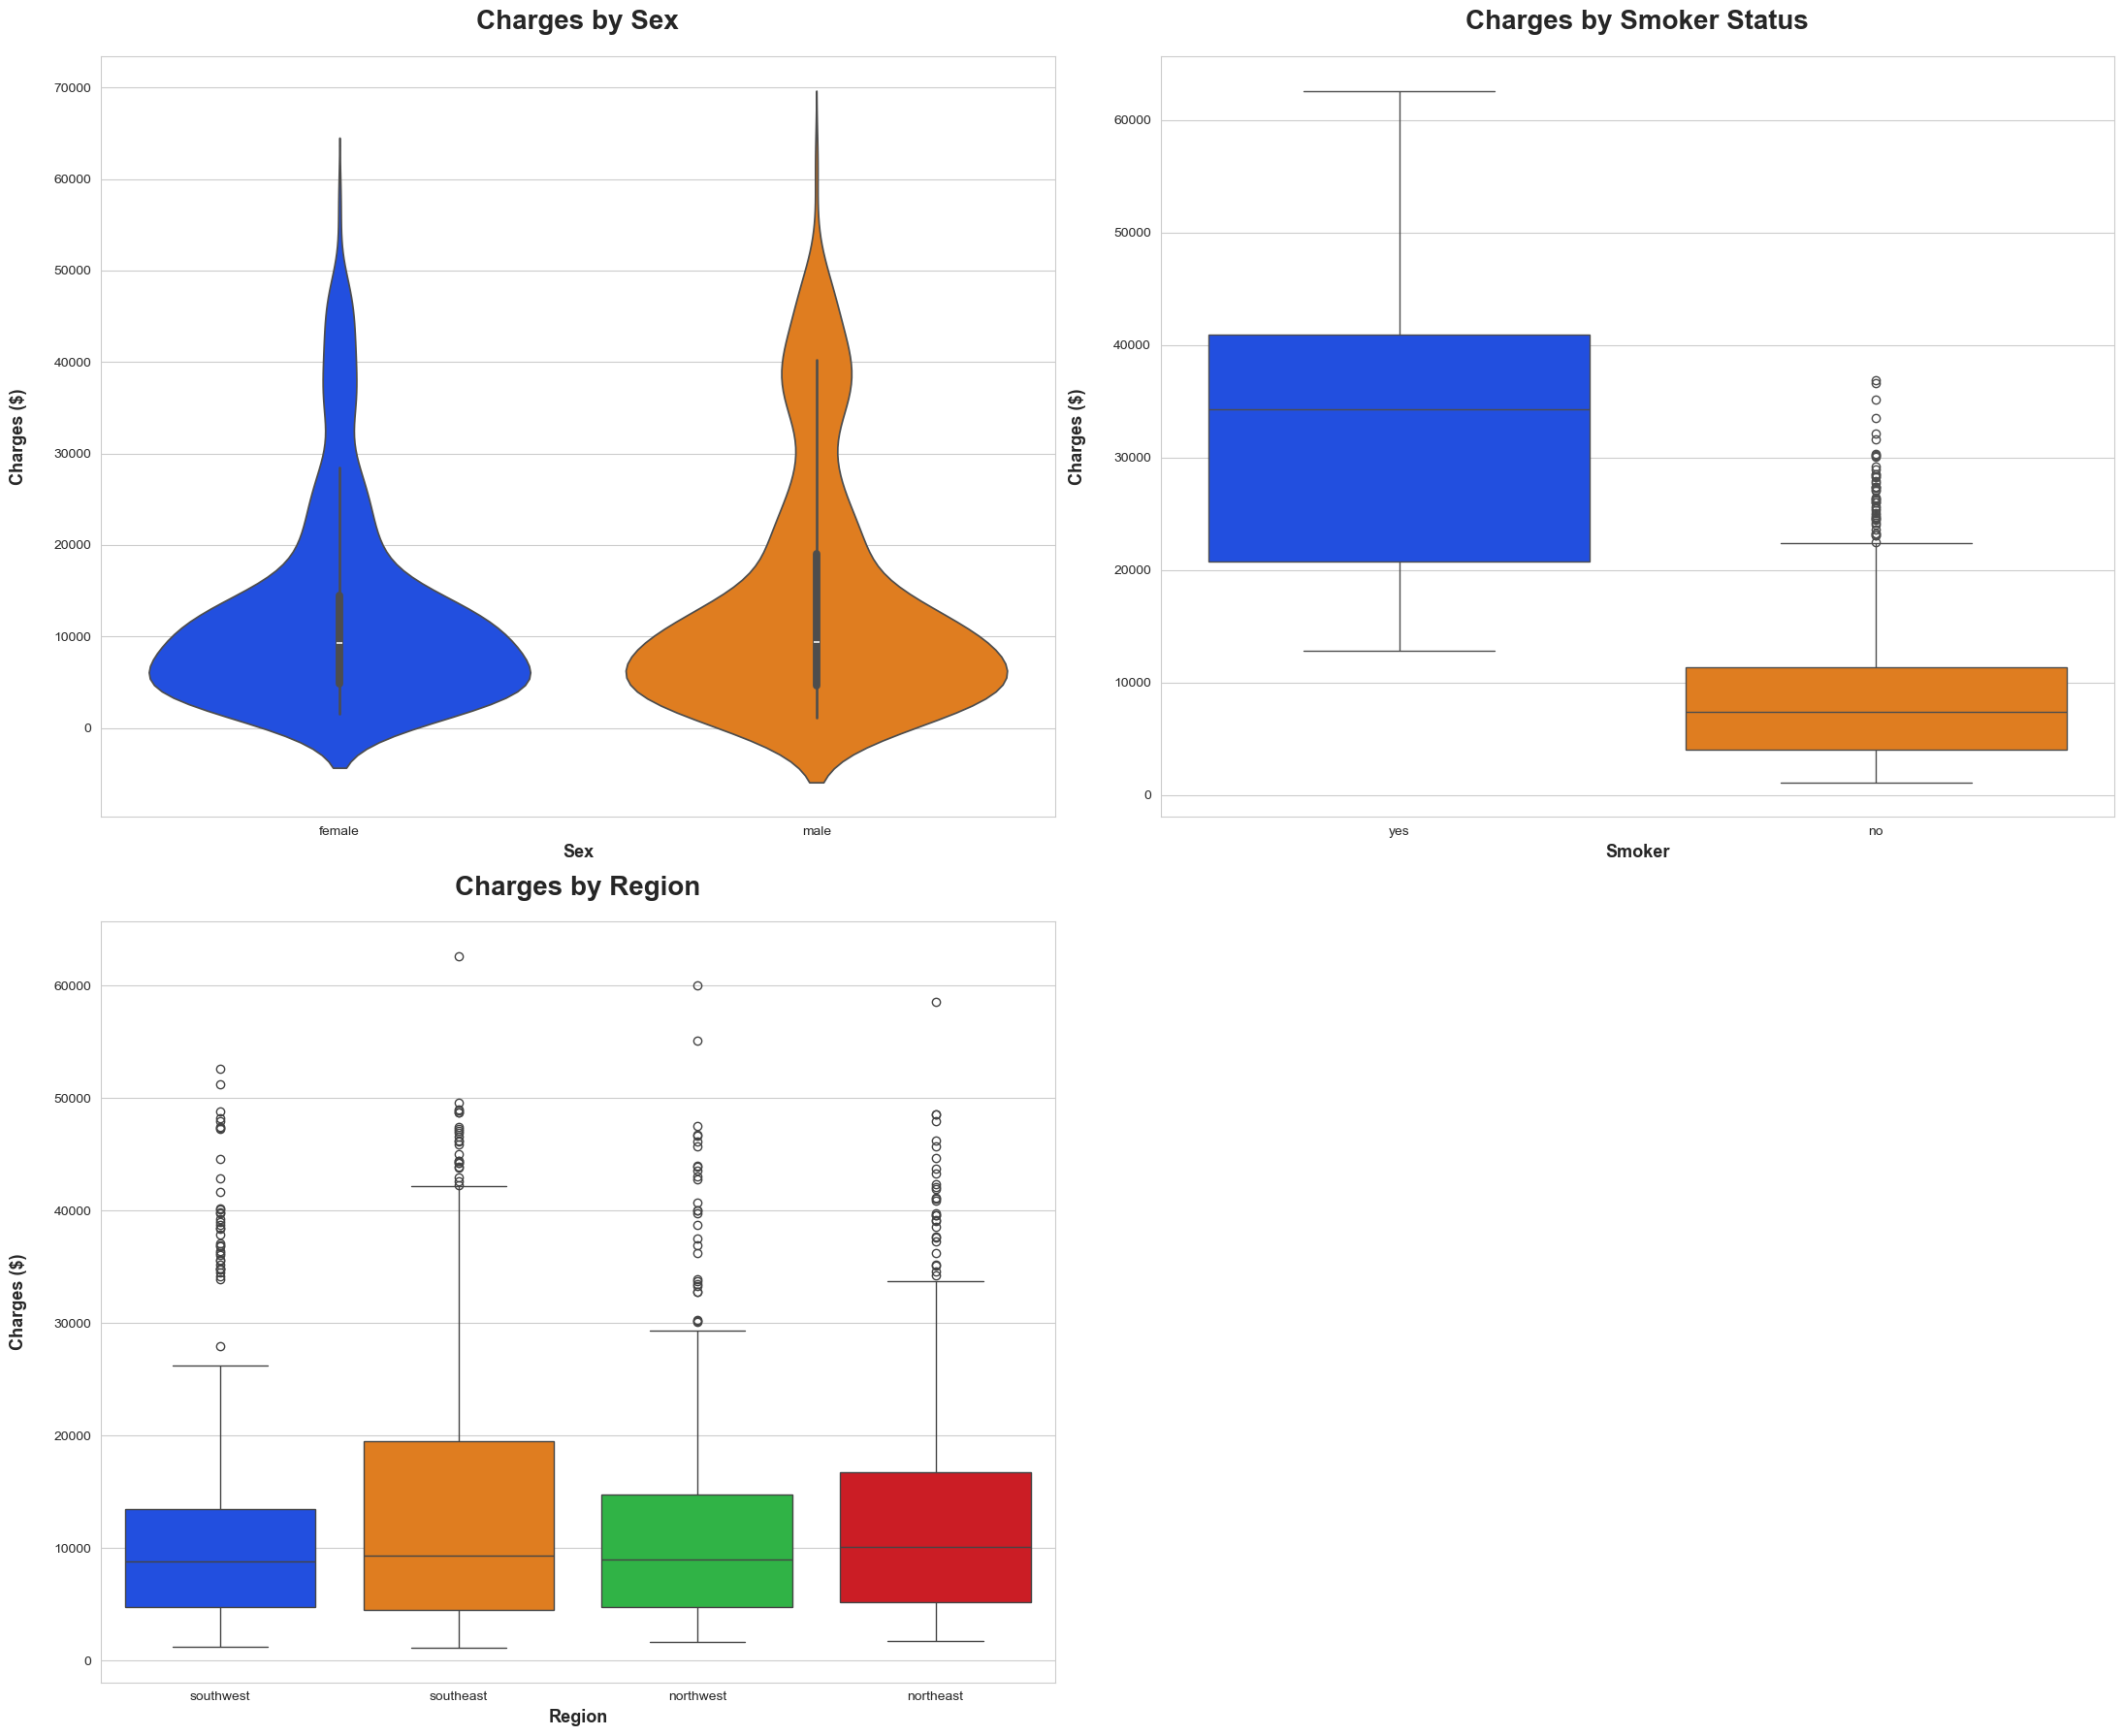

In [5594]:
#subplots for the categorical bivariate plots
fig, axes = plt.subplots(2, 2, figsize=(22, 18))
sns.set_style("whitegrid")
sns.violinplot(x='sex', y='charges', data=data_no_outliers, ax=axes[0][0], palette='bright')
axes[0][0].set_title('Charges by Sex',pad=20, fontweight='bold', fontsize=20)
axes[0][0].set_xlabel('Sex', fontsize=13, fontweight='bold')
axes[0][0].set_ylabel('Charges ($)', labelpad=20, fontsize=13, fontweight='bold')

sns.boxplot(x='smoker', y='charges', data=data_no_outliers, ax=axes[0][1], palette='bright')
axes[0][1].set_title('Charges by Smoker Status',pad=20, fontweight='bold', fontsize=20)
axes[0][1].set_xlabel('Smoker', fontsize=13, fontweight='bold')
axes[0][1].set_ylabel('Charges ($)', labelpad=20, fontsize=13, fontweight='bold')

sns.boxplot(x='region', y='charges', data=data_no_outliers, ax=axes[1][0], palette='bright')
axes[1][0].set_title('Charges by Region',pad=20, fontweight='bold', fontsize=20)
axes[1][0].set_xlabel('Region', fontsize=13, fontweight='bold')
axes[1][0].set_ylabel('Charges ($)', labelpad=20, fontsize=13, fontweight='bold')

fig.delaxes(axes[1, 1])
plt.tight_layout()
plt.show()

**Findings:**<br>
1. **Charges by Sex**: Both genders have a wide range of charges and a number of outliers, particularly on the higher end, indicating that while charges are generally similar, some individuals face significantly higher costs.
2. **Charges by Smoker Status**: The median charges for smokers are substantially higher than for non-smokers. The range of charges for smokers is  much wider, with many high-value outliers. This suggests that smoking status is a major driver of charges.
3. **Charges by Region**: The plot shows that charges are relatively similar across all four regions. The southeast region has a slightly higher median and more outliers on the high end compared to the other regions.

Below plots show the **relationship of interaction features**

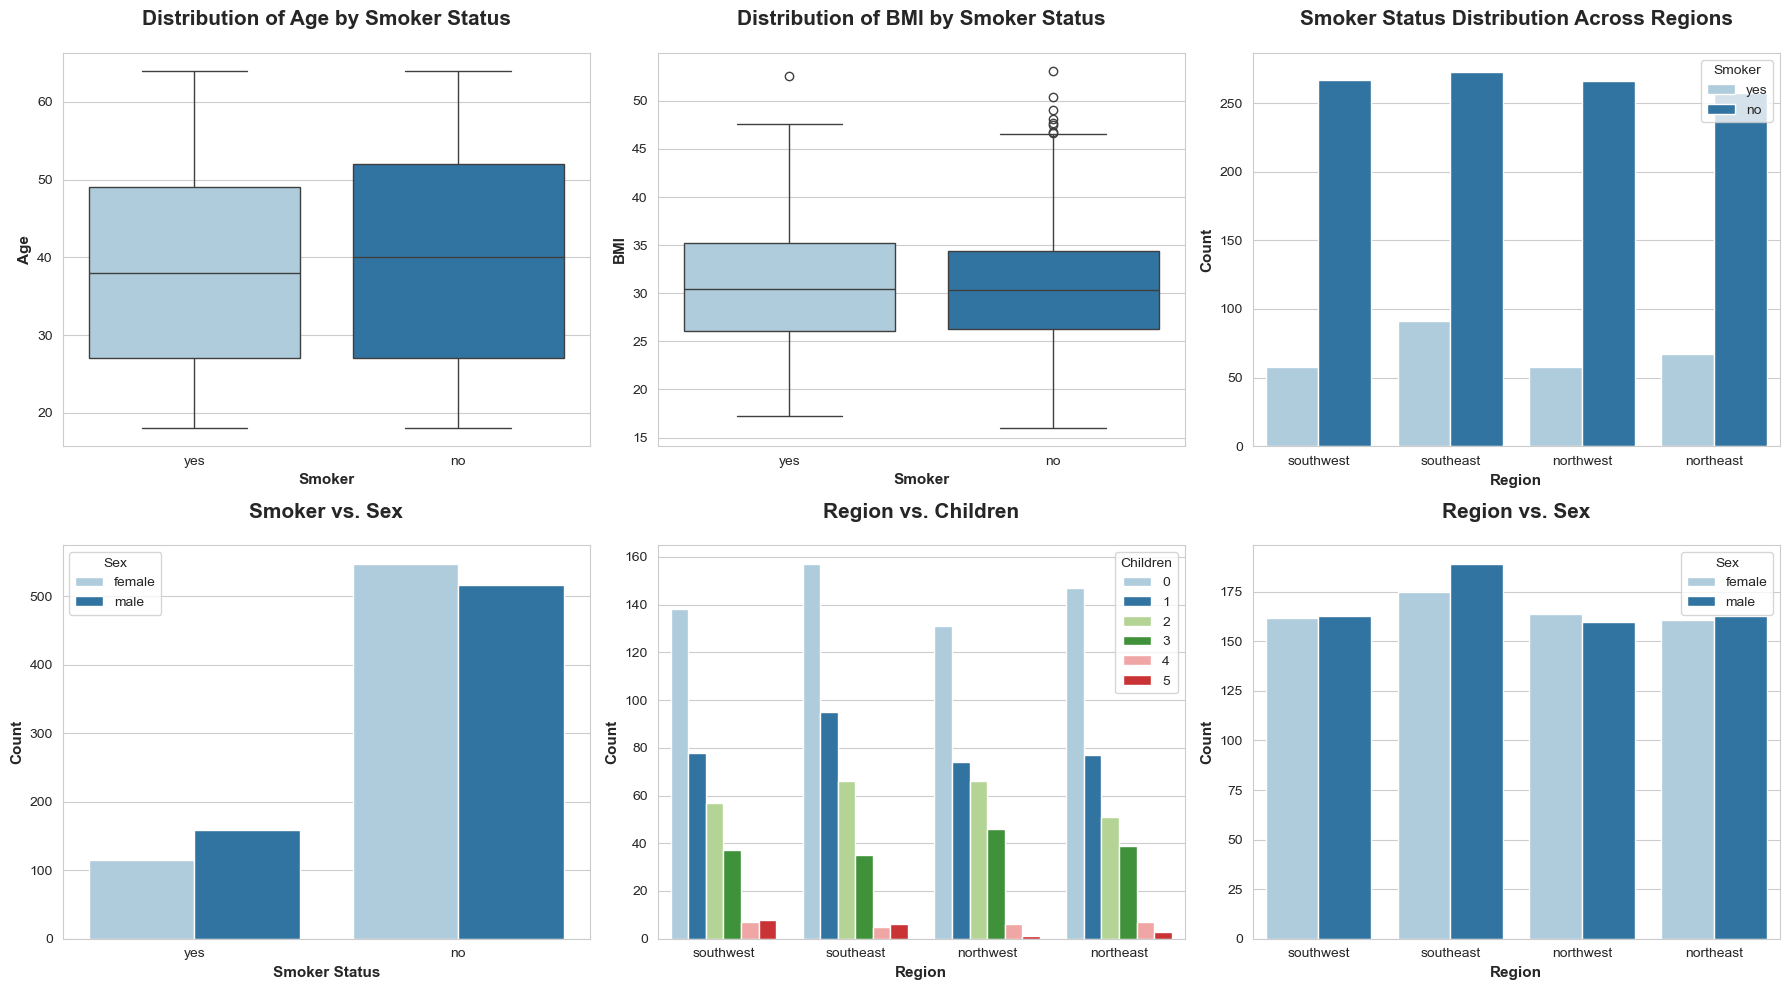

In [5597]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Age vs Smoker
sns.boxplot(x='smoker', y='age', data=data, ax=axes[0][0], palette='Paired')
axes[0][0].set_title('Distribution of Age by Smoker Status',pad=20, fontweight='bold', fontsize=15)
axes[0][0].set_xlabel('Smoker', fontsize=11, fontweight='bold')
axes[0][0].set_ylabel('Age', fontsize=11, fontweight='bold')

# BMI vs Smoker
sns.boxplot(x='smoker', y='bmi', data=data, ax=axes[0][1], palette='Paired')
axes[0][1].set_title('Distribution of BMI by Smoker Status',pad=20, fontweight='bold', fontsize=15)
axes[0][1].set_xlabel('Smoker', fontsize=11, fontweight='bold')
axes[0][1].set_ylabel('BMI', fontsize=11, fontweight='bold')

# Smoker vs Region
sns.countplot(x='region', hue='smoker', data=data, ax=axes[0][2], palette='Paired')
axes[0][2].set_title('Smoker Status Distribution Across Regions',pad=20, fontweight='bold', fontsize=15)
axes[0][2].set_xlabel('Region', fontsize=11, fontweight='bold')
axes[0][2].set_ylabel('Count', fontsize=11, fontweight='bold')
axes[0][2].legend(title='Smoker')

#Smoker Vs Sex
sns.countplot(data=data, x='smoker', hue='sex', ax=axes[1][0], palette='Paired')
axes[1][0].set_title('Smoker vs. Sex',pad=20, fontweight='bold', fontsize=15)
axes[1][0].set_xlabel('Smoker Status', fontsize=11, fontweight='bold')
axes[1][0].set_ylabel('Count', fontsize=11, fontweight='bold')
axes[1][0].legend(title='Sex')

#Region Vs Children
sns.countplot(data=data, x='region', hue='children', ax=axes[1][1], palette='Paired')
axes[1][1].set_title('Region vs. Children',pad=20, fontweight='bold', fontsize=15)
axes[1][1].set_xlabel('Region', fontsize=11, fontweight='bold')
axes[1][1].set_ylabel('Count', fontsize=11, fontweight='bold')
axes[1][1].legend(title='Children', loc='upper right')

# Region Vs Sex
sns.countplot(data=data, x='region', hue='sex', ax=axes[1][2], palette='Paired')
axes[1][2].set_title('Region vs. Sex',pad=20, fontweight='bold', fontsize=15)
axes[1][2].set_xlabel('Region', fontsize=11, fontweight='bold')
axes[1][2].set_ylabel('Count', fontsize=11, fontweight='bold')
axes[1][2].legend(title='Sex')

plt.tight_layout()
plt.show()

**Findings:**
1. **Age Vs. Smoker**: Age does not appear to be a major factor in distinguishing smokers from non-smokers
2. **BMI Vs. Smoker**: Smokers tend to have a slightly lower average BMI compared to non-smokers.
3. **Smoker Vs. Region**: Region is a strong determinant of smoking status, with the Southeast region having the highest prevalence of smokers. This **looks to be the most important interaction**.
4. **Smoker Vs. Sex**: There is a slight tendency for males to be smokers more often than females in the dataset
5. **Region Vs. Children**: The number of people with zero children is the highest across all regions. The distribution of children counts (1 to 5) appears fairly similar and balanced across the four regions.
6. **Region Vs. Sex**: The distribution of the total count of individuals across the four regions is nearly identical. Gender is well-balanced within each region, suggesting no significant gender bias based on geography

**Actionable Insights from Bivariate Analysis:**<br>
1. **Impact of Smoker status on Charges**: Smoking status is a primary driver of their insurance costs. Insurance company could develop targeted wellness programs to encourage smoking cessation. Offering premium discounts or other rewards for non-smokers could also be a strategy to manage costs and promote healthier lifestyles among policyholders. This could lead to a potentially lower future claims.
2. **The Minimal Impact of Sex and Region**: There is no significant difference in medical charges between genders or across regions, these factors are not strong predictors of charges. So the insurance company could focus of other factors primarily.
3. **Target Gigh-risk regions for smoker intervention**: The interaction between the Southeast region and smoker status should be treated as a high-risk group that requires the highest pricing adjustment.
4. **Addressing Potential Bias**: The lower BMI in smokers might be due to smoking's effect on metabolism. Health interventions must not be focusing solely on BMI as the primary metric for smokers, but rather prioritize cessation first, while monitoring for potential post-cessation weight gain which is a common side effect.

## Data Preparation

#### **Train/Test split:**

Splitting the data into train and test data before further data preprocessing in order to prevent data leakage.

In [5603]:
X=data.drop('charges', axis=1)
y=data['charges']

In [5604]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Categorical Data Handling:**

**One-Hot Encoding**

Performing One-Hot Encoding to the categorical column `smoker`

In [5608]:
# Identify the categorical column to be encoded
cat_columns = ['smoker', 'region', 'sex']

# Initialize the OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')

# Fit the encoder on the training data ONLY and transform both training and testing sets
X_train_encoded = ohe.fit_transform(X_train[cat_columns])
X_test_encoded = ohe.transform(X_test[cat_columns])

# Get the feature names for the new columns
cat_feature_names = ohe.get_feature_names_out(cat_columns)

# Convert the encoded arrays back into DataFrames
X_train_cat_df = pd.DataFrame(X_train_encoded, columns=cat_feature_names, index=X_train.index)
X_test_cat_df = pd.DataFrame(X_test_encoded, columns=cat_feature_names, index=X_test.index)

# Drop the original 'smoker' column
X_train_final = X_train.drop(cat_columns, axis=1)
X_test_final = X_test.drop(cat_columns, axis=1)

# Concatenate the new encoded columns with the rest of the features
X_train_final = pd.concat([X_train_final, X_train_cat_df], axis=1)
X_test_final = pd.concat([X_test_final, X_test_cat_df], axis=1)

X_train = X_train_final
X_test = X_test_final

In [5609]:
X_train.head()

,age,bmi,children,smoker_yes,region_northwest,region_southeast,region_southwest,sex_male
1114,23,24.510,0,0.0,0.0,0.0,0.0,1.0
968,21,25.745,2,0.0,0.0,0.0,0.0,1.0
599,52,37.525,2,0.0,1.0,0.0,0.0,0.0
170,63,41.470,0,0.0,0.0,1.0,0.0,1.0
275,47,26.600,2,0.0,0.0,0.0,0.0,0.0


In [5610]:
X_train_base = X_train.copy(deep='True')
X_test_base = X_test.copy(deep='True')

#### **Feature Engineering:**

Exploring if new informative columns can be created from the existing columns which can be important in deciding the insurance charges and improve the performance of the model.

**1. BMI Categories** <br>
It can be more useful to categorize BMI into groups that reflect health status, which can be a better predictor for insurance costs.

In [5614]:
# function to categorize BMI based on WHO standards
def get_bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

# Apply the function to the 'bmi' column in both the training and testing sets
X_train['bmi_category'] = X_train['bmi'].apply(get_bmi_category)
X_test['bmi_category'] = X_test['bmi'].apply(get_bmi_category)

**2. Age Groups**<br>
Age has been identified as a crucial factor, but its relationship with charges might not be linear. Creating age groups can help the model capture non-linear patterns.Divide the age feature into age groups (e.g., 18-29, 30-39, 40-49, 50-59, 60+). This can reveal that charges increase more sharply at certain life stages.

In [5616]:
# Define the bins and labels for age groups
bins = [17, 29, 39, 49, 59, float('inf')]
labels = ['18-29', '30-39', '40-49', '50-59', '60+']

# Create the new 'age_group' column for both sets
X_train['age_group'] = pd.cut(X_train['age'], bins=bins, labels=labels, right=True)
X_test['age_group'] = pd.cut(X_test['age'], bins=bins, labels=labels, right=True)

**3. Age-Smoker factor**<br>
Create a new feature `age_smoker` as the product of age and the one-hot encoded smoker_yes column. It would help the model learn if the effect of age on charges is different for smokers versus non-smokers.

In [5618]:
# Create the interaction feature for both the training and testing sets
# smoker_yes=1 indicates a smoker
# smoker_yes=0 indicates non-smoker
X_train['age_smoker'] = X_train['age'] * X_train['smoker_yes']
X_test['age_smoker'] = X_test['age'] * X_test['smoker_yes']

**4. BMI-Smoker factor** <br>
Create a new feature `bmi_smoker` that combines bmi and smoker status. The simple multiplication of a one-hot encoded smoker feature and the numerical BMI value can create a feature that helps the model understand the combined effect of high BMI and smoking on charges.

In [5620]:
# Create the interaction feature for both the training and testing sets
# smoker_yes=1 indicates a smoker
# smoker_yes=0 indicates non-smoker
X_train['bmi_smoker'] = X_train['bmi'] * X_train['smoker_yes']
X_test['bmi_smoker'] = X_test['bmi'] * X_test['smoker_yes']

**5. Region-Smoker factor**<br>
The high cost associated with being a smoker is the primary driver of charges. However, the cost of smoking is not constant across all regions. The new `region_smoker` feature enables the model to assign four distinct smoking penalties (one for each region).

In [5622]:
# Create the interaction feature for both the training and testing sets, corresponding to each region
# smoker_yes=1 indicates a smoker
# smoker_yes=0 indicates non-smoker
X_train['northwest_smoker'] = X_train['region_northwest'] * X_train['smoker_yes']
X_test['northwest_smoker'] = X_test['region_northwest'] * X_test['smoker_yes']

X_train['southeast_smoker'] = X_train['region_southeast'] * X_train['smoker_yes']
X_test['southeast_smoker'] = X_test['region_southeast'] * X_test['smoker_yes']

X_train['southwest_smoker'] = X_train['region_southwest'] * X_train['smoker_yes']
X_test['southwest_smoker'] = X_test['region_southwest'] * X_test['smoker_yes']

**6. Sex-Smoker factor**<br>
This new interaction feature `sex_smoker` captures the effect of smoking on charges for men and women.

In [5624]:
# Create the interaction feature for both the training and testing sets
# smoker_yes=1 indicates a smoker
# smoker_yes=0 indicates non-smoker
# sex_male = 1 indicates male
# sex_male = 0 indicates female
X_train['sex_smoker'] = X_train['sex_male'] * X_train['smoker_yes']
X_test['sex_smoker'] = X_test['sex_male'] * X_test['smoker_yes']

**7. Region-Children factor** <br>
This interaction features capture the effect of the number of children on charges across regions.

In [5626]:
# Create the interaction feature for both the training and testing sets, corresponding to each region
X_train['northwest_children'] = X_train['region_northwest'] * X_train['children']
X_test['northwest_children'] = X_test['region_northwest'] * X_test['children']

X_train['southeast_children'] = X_train['region_southeast'] * X_train['children']
X_test['southeast_children'] = X_test['region_southeast'] * X_test['children']

X_train['southwest_children'] = X_train['region_southwest'] * X_train['children']
X_test['southwest_children'] = X_test['region_southwest'] * X_test['children']

**8. Region-Sex factor** <br>
This interaction features capture the effect `sex` on charges across regions.

In [5628]:
X_train['northwest_sex'] = X_train['region_northwest'] * X_train['sex_male']
X_test['northwest_sex'] = X_test['region_northwest'] * X_test['sex_male']

X_train['southeast_sex'] = X_train['region_southeast'] * X_train['sex_male']
X_test['southeast_sex'] = X_test['region_southeast'] * X_test['sex_male']

X_train['southwest_sex'] = X_train['region_southwest'] * X_train['sex_male']
X_test['southwest_sex'] = X_test['region_southwest'] * X_test['sex_male']

Encoding the newly created categorical columns `bmi_category` and `age_group` into numerical columns using **One-Hot Encoding**.

In [5630]:
# Identify categorical and numerical columns
categorical_cols = ['bmi_category','age_group']
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit encoder on training data and transform both train and test data
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Create DataFrames from the encoded arrays with proper column names
encoded_cols_names = encoder.get_feature_names_out(categorical_cols)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_cols_names, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_cols_names, index=X_test.index)

# Drop original categorical columns from X_train and X_test and concatenate with encoded dataframes
X_train_processed = pd.concat([X_train[numerical_cols], X_train_encoded_df], axis=1)
X_test_processed = pd.concat([X_test[numerical_cols], X_test_encoded_df], axis=1)

X_train = X_train_processed
X_test = X_test_processed

In [5631]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1069 entries, 1114 to 1127
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1069 non-null   int64  
 1   bmi                       1069 non-null   float64
 2   children                  1069 non-null   int64  
 3   smoker_yes                1069 non-null   float64
 4   region_northwest          1069 non-null   float64
 5   region_southeast          1069 non-null   float64
 6   region_southwest          1069 non-null   float64
 7   sex_male                  1069 non-null   float64
 8   age_smoker                1069 non-null   float64
 9   bmi_smoker                1069 non-null   float64
 10  northwest_smoker          1069 non-null   float64
 11  southeast_smoker          1069 non-null   float64
 12  southwest_smoker          1069 non-null   float64
 13  sex_smoker                1069 non-null   float64
 14  northwest_

#### **Transformations:**

**1. Polynomial Features:**

We have seen so far that the relationship of the input features `age` and `bmi` which are strong predictors, with the target variable `charges` is not a simple straight line.

**Age**: The increase in insurance costs might accelerate as a person gets older, so a feature like age^2 could be useful. <br>
**BMI**: Moving from an overweight to an obese BMI category could lead to a disproportionately larger jump in costs than a move from a normal weight to overweight, which can be captured by a feature like BMI^2
 

Applying quadratic transformations to `age` and `bmi` using **PolynomialFeatures**

In [5636]:
# Identify numerical columns for polynomial features
poly_features_cols = ['age', 'bmi']

# Initialize PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

# Fit and transform the numerical columns for both training and testing sets
X_train_poly = poly.fit_transform(X_train[poly_features_cols])
X_test_poly = poly.transform(X_test[poly_features_cols])

# Get the feature names for the new polynomial columns
poly_feature_names = poly.get_feature_names_out(poly_features_cols)

# Create dataframes from the polynomial feature arrays
X_train_poly_df = pd.DataFrame(X_train_poly, columns=poly_feature_names, index=X_train.index)
X_test_poly_df = pd.DataFrame(X_test_poly, columns=poly_feature_names, index=X_test.index)

# Drop original polynomial feature columns from X_train and X_test and concatenate the new polynomial features
X_train_processed = pd.concat([X_train_poly_df, X_train.drop(poly_features_cols, axis=1)], axis=1)
X_test_processed = pd.concat([X_test_poly_df, X_test.drop(poly_features_cols, axis=1)], axis=1)

X_train = X_train_processed
X_test = X_test_processed

In [5637]:
X_train.head()

,age,bmi,age^2,age bmi,bmi^2,children,smoker_yes,region_northwest,region_southeast,region_southwest,...,southwest_sex,bmi_category_Normal,bmi_category_Obese,bmi_category_Overweight,bmi_category_Underweight,age_group_18-29,age_group_30-39,age_group_40-49,age_group_50-59,age_group_60+
1114,23.0,24.510,529.0,563.730,600.740100,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
968,21.0,25.745,441.0,540.645,662.805025,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
599,52.0,37.525,2704.0,1951.300,1408.125625,2,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
170,63.0,41.470,3969.0,2612.610,1719.760900,0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
275,47.0,26.600,2209.0,1250.200,707.560000,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [5638]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1069 entries, 1114 to 1127
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1069 non-null   float64
 1   bmi                       1069 non-null   float64
 2   age^2                     1069 non-null   float64
 3   age bmi                   1069 non-null   float64
 4   bmi^2                     1069 non-null   float64
 5   children                  1069 non-null   int64  
 6   smoker_yes                1069 non-null   float64
 7   region_northwest          1069 non-null   float64
 8   region_southeast          1069 non-null   float64
 9   region_southwest          1069 non-null   float64
 10  sex_male                  1069 non-null   float64
 11  age_smoker                1069 non-null   float64
 12  bmi_smoker                1069 non-null   float64
 13  northwest_smoker          1069 non-null   float64
 14  southeast_

Now we have the preprocessed final train and test datasets which are ready for building a model.

## Modeling

**Establishing a Baseline**<br>
Using Multiple Linear Regression as the baseline with only its original features before Feature Engineering.

In [5642]:
# Multiple Linear Regression as the baseline using only the original features before Feature Engineering.
base_model = LinearRegression()

#training model
base_model.fit(X_train_base,y_train)

#predicting on test data
y_pred_base = base_model.predict(X_test_base)

# CAlculating the metrics
base_rmse = root_mean_squared_error(y_test,y_pred_base)
base_mae = mean_absolute_error(y_test, y_pred_base)
base_r2 = r2_score(y_test, y_pred_base)

print(f"BASELINE PERFORMANCE:")
print("="*37)
print(f"Test RMSE with the base model: {base_rmse:.2f}")
print(f"Test MAE with the base model: {base_mae:.2f}")
print(f"Test R^2 score with base  model: {base_r2:.2f}")
print("="*37)

BASELINE PERFORMANCE:
Test RMSE with the base model: 5956.34
Test MAE with the base model: 4177.05
Test R^2 score with base  model: 0.81


Exploring some of the Linear and Tree models to find out the appropriate ML model for the dataset with the entire features including all interactive and engineered features. Trying out **Linear Regression**, **Ridge Regression**, **Lasso Regression**, **Random Forest Regressor** and **Gradient Boost Regressor** with their default parameter setting.

In [5644]:
# Build and evaluate models using cross-validation
reg_models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression" : Ridge(alpha=0.1),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boost Regressor": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,random_state=42)
}

cv_results = {}
# 5-fold Cross validation on the training data after Scaling
for name, model in reg_models.items():
    pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                               ('regressor', model)])
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)
    cv_results[name] = {
        'Mean RMSE': rmse_scores.mean(),
    }

print("Cross-Validation results (Mean RMSE and Standard Deviation) of Training Data:")
print("="*75)
for name, res in cv_results.items():
    print(f"Model: {name}")
    print(f"  Mean RMSE: {res['Mean RMSE']:.2f}")

#Find the best model
# Find the best model based on the mean RMSE from cross-validation
best_model_name = min(cv_results, key=lambda k: cv_results[k]['Mean RMSE'])
best_model_regressor = reg_models[best_model_name]

# Create and train the final pipeline with the best model
final_pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                                 ('regressor', best_model_regressor)])
# Fit the best model on the training data and evaluate on the test set
final_pipeline.fit(X_train, y_train)

# Make predictions on the unseen test data
y_pred = final_pipeline.predict(X_test)

# Calculate RMSE on the test set
default_test_rmse = root_mean_squared_error(y_test, y_pred)
default_test_mae = mean_absolute_error(y_test, y_pred)
default_test_r2 = r2_score(y_test, y_pred)
print("\n" + "="*70)
print(f"Best Model: {best_model_name}")
print(f"Test RMSE with the best model (Gradient Boosting Regressor): {default_test_rmse:.2f}")
print(f"Test MAE with the best model (Gradient Boosting Regressor): {default_test_mae:.2f}")
print(f"Test R^2 score with the best model (Gradient Boosting Regressor): {default_test_r2:.2f}")
print("="*70)

Cross-Validation results (Mean RMSE and Standard Deviation) of Training Data:
Model: Linear Regression
  Mean RMSE: 4862.21
Model: Ridge Regression
  Mean RMSE: 4843.18
Model: Lasso Regression
  Mean RMSE: 4843.66
Model: Random Forest Regressor
  Mean RMSE: 4859.79
Model: Gradient Boost Regressor
  Mean RMSE: 4641.51

Best Model: Gradient Boost Regressor
Test RMSE with the best model (Gradient Boosting Regressor): 4488.46
Test MAE with the best model (Gradient Boosting Regressor): 2543.94
Test R^2 score with the best model (Gradient Boosting Regressor): 0.89


### Hyperparameter Tuning

Now that we have established the performance of baseline models above, we will do the hyperparameter tuning of those models to improve their performance.

In [5647]:
# Define hyperparameter grids for tuning
param_grids = {
    "Linear Regression": {
        # Linear Regression has no hyperparameters to tune; 
        'regressor': [LinearRegression()] 
    },
    "Ridge Regression": {
        'regressor__alpha': np.logspace(-4, 0, 5, 10, 50), 
        'regressor__max_iter': [100000] 
    },
    "Lasso Regression": {
        'regressor__alpha': np.logspace(-4, 0, 5, 10, 50),
        'regressor__max_iter': [100000]
        },
    "Random Forest Regressor": {
        'regressor__n_estimators': [100, 200, 300],
        'regressor__max_depth': [10, 20, None],
        'regressor__min_samples_split': [2, 5]
    },
    "Gradient Boost Regressor": {
        'regressor__n_estimators': [100, 200],
        'regressor__learning_rate': [0.05, 0.1, 0.2],
        'regressor__max_depth': [3, 5]
    }
}

In [5648]:
tuned_cv_results = {}
best_estimators = {}
best_model_name = None
best_model = None
min_rmse = float('inf')

# Perform Hyperparameter Tuning and Cross-Validation
for name, model in reg_models.items():
    # Create the pipeline (Scaler + Regressor)
    pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                               ('regressor', model)])
        # Setup GridSearchCV
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grids[name],
        scoring='neg_mean_squared_error',
        cv=5, 
        n_jobs=-1,
        verbose=0
    )

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)
    
    best_pipeline = grid_search.best_estimator_
    best_mean_rmse = np.sqrt(-grid_search.best_score_)    
    tuned_cv_results[name] = {
        'Mean RMSE': best_mean_rmse,
        'Best Parameters': grid_search.best_params_,
    }
    best_estimators[name] = best_pipeline
    
    # Track the overall best model found so far
    if best_mean_rmse < min_rmse:
        min_rmse = best_mean_rmse
        best_model_name = name
        best_model = model

print("\nCross-Validation Tuning Results (Mean RMSE and Best Parameters):")
print("="*64)
for name, res in tuned_cv_results.items():
    print(f"Model: {name}")
    print(f"  Mean RMSE: {res['Mean RMSE']:.4f}")
    
    # Special handling for Linear Regression output since its 'Best Parameters' is a dummy
    if name != "Linear Regression":
        print(f"  Best Parameters: {res['Best Parameters']}")
    else:
        print(f"  Best Parameters: No tuning applied (StandardScaler used)")
    print("-" * 30)

# Final Evaluation on Test Set using the Overall Best Model
final_pipeline = best_estimators[best_model_name]

# Make predictions on the unseen test data
y_pred_best = final_pipeline.predict(X_test)

# Calculate final metrics on the test set
test_rmse_best = root_mean_squared_error(y_test, y_pred_best)
test_mae_best = mean_absolute_error(y_test, y_pred_best)
test_r2_best = r2_score(y_test, y_pred_best)

print("\n" + "="*70)
print(f"OVERALL BEST MODEL AFTER HYPER PARAMETER TUNING(Selected from CV Results): {best_model_name}")
print(f" {best_model_name} PERFORMANCE:")
print(f"  Test RMSE: {test_rmse_best:.4f}")
print(f"  Test MAE: {test_mae_best:.4f}")
print(f"  Test R^2 score: {test_r2_best:.4f}")
print("="*70)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.963e+08, tolerance: 1.205e+07
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.434e+07, tolerance: 1.189e+07
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.725e+08, toler


Cross-Validation Tuning Results (Mean RMSE and Best Parameters):
Model: Linear Regression
  Mean RMSE: 4881.1130
  Best Parameters: No tuning applied (StandardScaler used)
------------------------------
Model: Ridge Regression
  Mean RMSE: 4860.2351
  Best Parameters: {'regressor__alpha': 1.0, 'regressor__max_iter': 100000}
------------------------------
Model: Lasso Regression
  Mean RMSE: 4860.5809
  Best Parameters: {'regressor__alpha': 1.0, 'regressor__max_iter': 100000}
------------------------------
Model: Random Forest Regressor
  Mean RMSE: 4754.4693
  Best Parameters: {'regressor__max_depth': 10, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 200}
------------------------------
Model: Gradient Boost Regressor
  Mean RMSE: 4587.4520
  Best Parameters: {'regressor__learning_rate': 0.05, 'regressor__max_depth': 3, 'regressor__n_estimators': 100}
------------------------------

OVERALL BEST MODEL AFTER HYPER PARAMETER TUNING(Selected from CV Results): Gradient Boos

### Model Interpretation:

Interpreting the Gradient Boost Regressor using Feature Importance (SHAP Analysis)

#### Feature Importance (using SHAP)

In [5652]:
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)
feature_importance = pd.Series(
    np.abs(shap_values).mean(axis=0),
    index=X_test.columns
).sort_values(ascending=False)

print("Feature Importance (Mean Absolute SHAP Values):")
print("="*47)
print(feature_importance)

Feature Importance (Mean Absolute SHAP Values):
bmi_smoker                  8476.880053
age^2                       4070.035451
age                         1972.336524
children                    1138.340868
age bmi                     1136.968006
smoker_yes                   911.975230
bmi^2                        653.442365
age_smoker                   510.510215
region_northwest             435.733854
bmi                          301.484621
northwest_children           178.785641
southeast_children            98.181292
age_group_40-49               88.119963
sex_male                      80.525028
region_southwest              56.957000
southwest_children            49.307204
northwest_sex                 40.384489
age_group_18-29               31.942938
age_group_30-39               18.513181
southwest_sex                  8.803484
bmi_category_Overweight        8.089456
age_group_60+                  5.890929
southeast_sex                  1.751755
southwest_smoker               1

**Interpretation of the SHAP results:** <br>

**1. Primary and Non-Linear features (Highest Importance)**

**Age and its Transformations**:

`age` (25067.76): This is by far the most important feature. This is expected, as medical risk and insurance charges typically rise significantly with age.

`bmi^2` (2840.01), `age bmi` (2552.20), `age^2` (2162.42): The high importance of these squared and interaction terms confirms that the relationship between age, BMI, and charges is highly non-linear. The model relies heavily on these transformations to accurately capture the combined effects of aging and increasing body mass.

BMI:

`bmi` (2506.42): Even after its squared and interaction terms are considered, BMI remains a highly influential main effect.<br>

**2. Strong Main features and Primary Interactions**

**Region:**

`region_southwest` (1099.77), `region_northwest` (397.19), `region_southeast` (135.45): These represent the effect of being in that region relative to the baseline region Northeast. Being in the Southwest has the largest individual regional effect on average charges.

**Children:**

`children` (611.69): The number of children has a substantial effect on the predicted charges.

**Age-Smoker Interaction:**

`age_smoker` (561.04): This is a critical term. Its high importance means the effect of smoking on charges changes dramatically with age. <br>

**3. Moderate and Lower Importance Interactions**

**Smoker Status:**

`smoker_yes` (178.28): While low compared to age, this indicates that the main, linear effect of smoking is important, but its predictive power is largely captured by its interactions with other variables (like age_smoker).

**Region-Smoker Interactions:**

`northwest_smoker` (79.17), `southwest_smoker` (14.07), `southeast_smoker` (10.89): These terms confirm that the cost penalty for being a smoker varies by region. The Northwest has the strongest unique smoker penalty relative to the baseline Northeast.

**Sex-Based Interactions:**

`sex_male` (55.14): The effect of being male is moderate.

`sex_smoker` (23.81): This confirms that the smoking penalty is slightly different for males vs. females, though it's a minor effect compared to the age_smoker interaction.

`northwest_sex` (22.76), `southwest_sex` (2.70), `southeast_sex` (0.34): These show that the gender effect on charges varies by region, with the strongest interaction occurring in the Northwest.

**Region-Children Interactions:**

`southeast_children` (21.29), `southwest_children` (16.34), `northwest_children` (7.84): These are low-to-moderate importance, suggesting that the impact of having children differs across regions, but the main effect of children (611.69) is much more significant.<br>

**4. Features with Negligible Importance**

**BMI and Age Group Categories:**

All `bmi_category` and `age_group` features have very low or zero importance. This strongly suggests that the numerical features (age and bmi) and their non-linear transformations (age^2, bmi^2, age bmi) have fully captured all the predictive information, making the categorized versions of these variables redundant.

**Conclusion:** <br>
The Gradient Boosting Regressor is highly reliant on age, BMI, and non-linear combinations of these two variables to predict insurance charges. While the basic binary categories (like sex_male or smoker_yes) provide some predictive power, their influence is magnified when interacting with age, confirming that health risk is rarely a simple, additive combination of factors. The model has learned that the biggest predictor of cost is simply how old a person is and how high their BMI is, and the speed at which that cost accelerates (the squared terms).

Re-tuning and retraining the Gradient Boost Regressor based on the feature importance given by SHAP analysis above.

In [5655]:
SHAP_THRESHOLD = 0.3
shap_scores = feature_importance.to_dict()

# Identify Features to Keep
# Filter the keys (feature names) based on the threshold
final_selected_features = [
    feature for feature, score in shap_scores.items()
    if score >= SHAP_THRESHOLD
]
print(f"\nSelected Features:")
print("="*18)
print(final_selected_features)
print("="*18)


Selected Features:
['bmi_smoker', 'age^2', 'age', 'children', 'age bmi', 'smoker_yes', 'bmi^2', 'age_smoker', 'region_northwest', 'bmi', 'northwest_children', 'southeast_children', 'age_group_40-49', 'sex_male', 'region_southwest', 'southwest_children', 'northwest_sex', 'age_group_18-29', 'age_group_30-39', 'southwest_sex', 'bmi_category_Overweight', 'age_group_60+', 'southeast_sex', 'southwest_smoker', 'bmi_category_Obese', 'northwest_smoker']


In [5656]:
X_train_selected = X_train[final_selected_features]
X_test_selected = X_test[final_selected_features]

# NOTE: Rerunning grid search for demonstration, but full re-tuning is ideal
# Here we just re-fit the *best* model's pipeline to the reduced set
        
# NOTE: The StandardScaler in the pipeline needs to be retrained on the reduced set
final_pipeline_selected = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('regressor', reg_models[best_model_name])
    ])
        
# Fit on selected features
final_pipeline_selected.fit(X_train_selected, y_train)

# Make predictions on the unseen test data
y_pred_selected = final_pipeline_selected.predict(X_test_selected)

# Calculate final metrics on the test set
test_rmse_selected = root_mean_squared_error(y_test, y_pred_selected)
test_mae_selected = mean_absolute_error(y_test, y_pred_selected)
test_r2_selected = r2_score(y_test, y_pred_selected)
print("\n" + "="*68)
print(f"PERFORMANCE OF GRADIENT BOOSTER AFTER FEATURE SELECTION:")
print(f" Test RMSE: {test_rmse_selected:.4f}")
print(f" Test MAE: {test_mae_selected:.4f}")
print(f" Test R^2 score: {test_r2_selected:.4f}")
print("="*68)


PERFORMANCE OF GRADIENT BOOSTER AFTER FEATURE SELECTION:
 Test RMSE: 4455.3056
 Test MAE: 2528.1838
 Test R^2 score: 0.8920


**Observation from Feature Selected model performance:**
1. The metrics (RMSE, MAE, R^2) are worse after feature selection: This indicates that the discarded features, despite having low Mean Absolute SHAP values, still contained valuable, non-redundant predictive information.
2. Though SHAP values measure the average magnitude of contribution a feature has, they don't capture the entire complexity of a feature's role.
3. In this case it is **better to use the full feature set** (the one that includes all 32 features) because the marginal gain from those low-importance features collectively outweighs the benefit of a simpler model.


## Evaluation

#### **Interpreting the Cross-Validation Results**

Below is the detailed comparison and interpretation of the Cross Validation results before and after hyperparameter tuning,  and selecting the best performing model.

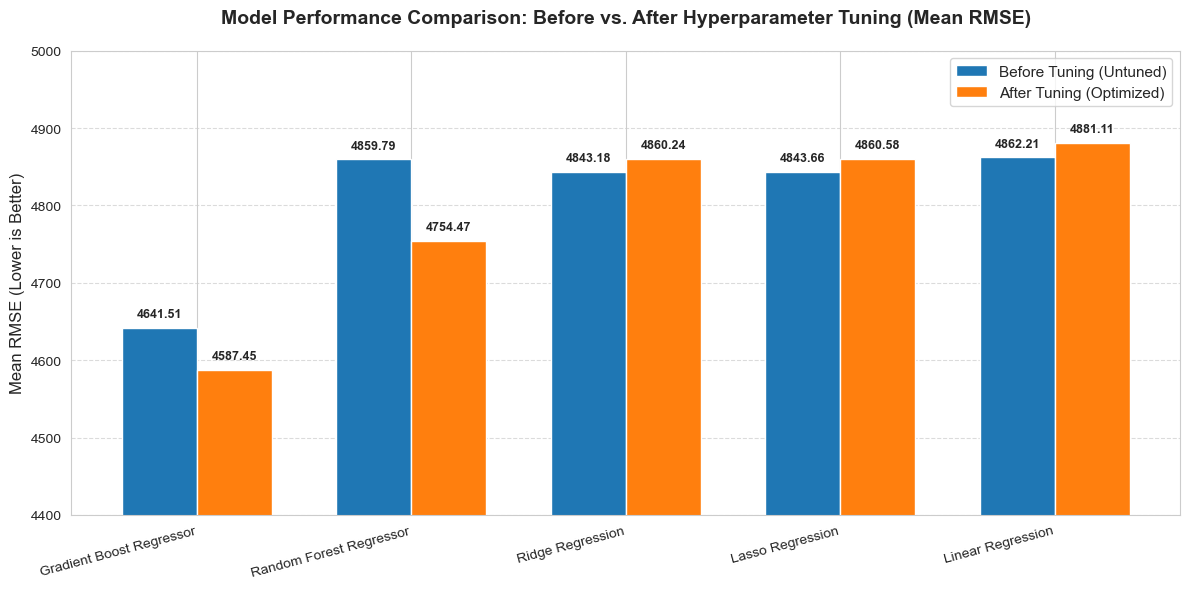

In [5661]:
#Creating a dataframe of the cv results
df_cv_before = pd.DataFrame(cv_results).T.reset_index()
df_cv_after = pd.DataFrame(tuned_cv_results).T.reset_index()
df_cv_after = df_cv_after.drop('Best Parameters', axis=1)

# Merging the result dataframes of before and after tuning
df_tuning = pd.merge(
    left=df_cv_before, 
    right=df_cv_after, 
    on='index', 
    how='left'
)

df_tuning.columns = ['Model', 'Before Tuning RMSE', 'After Tuning RMSE']

df_tuning = df_tuning.set_index('Model')

# Sort by the final (After Tuning) RMSE for clear ranking
df_tuning_sorted = df_tuning.sort_values(by='After Tuning RMSE', ascending=True)

# Create the Grouped Bar Chart ---
fig, ax = plt.subplots(figsize=(12, 6))

# Define bar width and positions
bar_width = 0.35
index = np.arange(len(df_tuning_sorted))

# Create the bars
bar1 = ax.bar(
    index - bar_width/2, 
    df_tuning_sorted['Before Tuning RMSE'], 
    bar_width, 
    label='Before Tuning (Untuned)', 
    color='#1f77b4' # Blue
)
bar2 = ax.bar(
    index + bar_width/2, 
    df_tuning_sorted['After Tuning RMSE'], 
    bar_width, 
    label='After Tuning (Optimized)', 
    color='#ff7f0e' # Orange
)

# Add data labels
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 10, 
                f'{yval:.2f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

add_labels(bar1)
add_labels(bar2)

# Set titles and labels
ax.set_title(
    'Model Performance Comparison: Before vs. After Hyperparameter Tuning (Mean RMSE)', 
    fontsize=14, pad=20,
    fontweight='bold'
)
ax.set_ylabel('Mean RMSE (Lower is Better)', fontsize=12)
ax.set_xlabel('')

# Set X-tick labels and rotate them
ax.set_xticks(index)
ax.set_xticklabels(df_tuning_sorted.index, rotation=15, ha='right', fontsize=10) 

# Set appropriate y-limits
ax.set_ylim(4400, 5000)

ax.legend(loc='upper right', fontsize=11)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### **Key Findings:**<br>

The visualization clearly compares the performance of five different regression models before and after hyperparameter tuning, using the Mean RMSE (Root Mean Squared Error) as the primary metric.

**1. Overall Model Ranking and Selection** <br>

*  **Best Model:** The **Gradient Boost Regressor (GBR)** achieved the lowest error after tuning, with a Mean RMSE of $4587.45. This confirms it's the optimal model for this dataset.

* **Second Best:** The Random Forest Regressor is a respectable second at $4754.47.

* **Worst Performers:** All three linear models (Linear, Ridge, and Lasso) with errors around 4860 to 4881.

**2. Impact of Model Complexity**

* **Ensemble vs. Linear:** The best ensemble model (GBR) is approximately $273 lower in error than the best linear model (Ridge).

    This large gap suggests that the relationship between the features and the target variable is highly non-linear and involves complex feature interactions. Linear models cannot capture this complexity, whereas GBR and Random Forest thrive on it.

**3. Effectiveness of Hyperparameter Tuning**

* **Gradient Boost & Random Forest**: RMSE Decreased (Improved)
* **Linear Models**: RMSE Increased (Worsened)

#### **Interpreting the Final Test Results** 

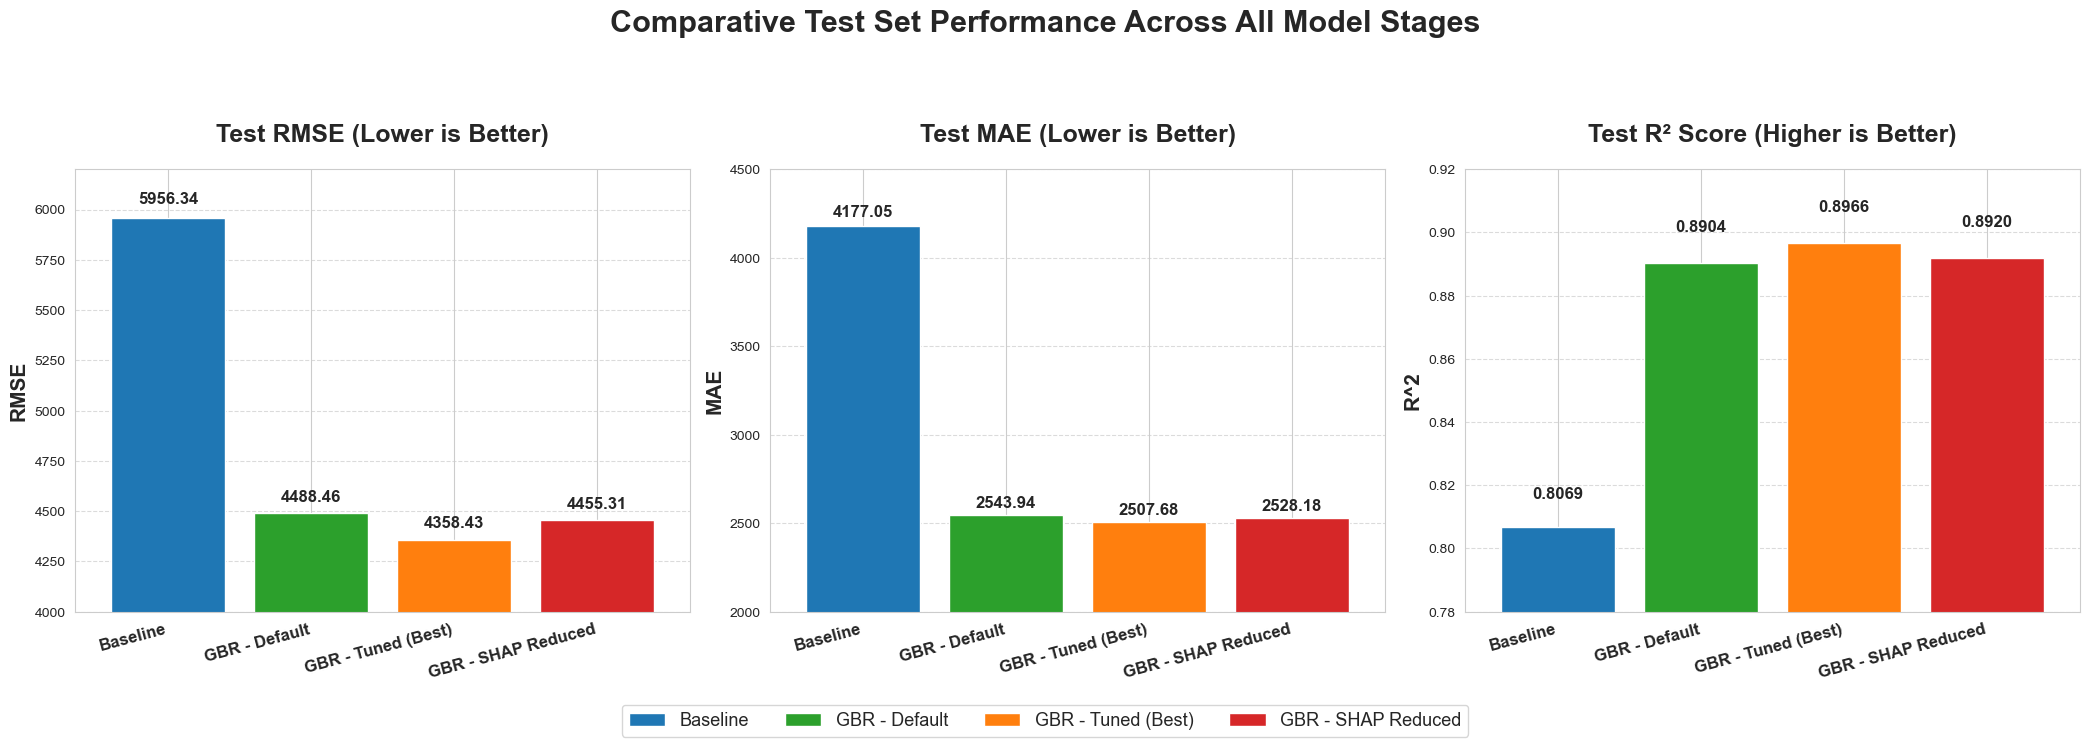

In [5664]:
# Define All Model Performance Metrics ---
model_metrics = {
    'Model': [
        'Baseline', 
        'GBR - Default', 
        'GBR - Tuned (Best)', 
        'GBR - SHAP Reduced'
    ],
    
    # RMSE (Lower is better)
    'RMSE': [base_rmse, default_test_rmse, test_rmse_best, test_rmse_selected],
    
    # MAE (Lower is better)
    'MAE': [base_mae, default_test_mae, test_mae_best, test_mae_selected],
    
    # R^2 Score (Higher is better)
    'R^2': [base_r2, default_test_r2, test_r2_best, test_r2_selected]
}
df_metrics = pd.DataFrame(model_metrics).set_index('Model')

# Create the Grouped Bar Chart
fig, axes = plt.subplots(1, 3, figsize=(21, 7))
metrics = ['RMSE', 'MAE', 'R^2']
titles = ['Test RMSE (Lower is Better)', 'Test MAE (Lower is Better)', 'Test R² Score (Higher is Better)']

# Colors for the four models
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728'] # Blue, Green, Orange, Red

# Plotting each metric
for i, metric in enumerate(metrics):
    ax = axes[i]
    
    # Use pandas plot.bar() for easier grouped bar plotting
    df_metrics[metric].plot(kind='bar', ax=ax, color=colors, legend=False, width=0.8)

    # Adding the value labels on top of the bars
    for j, bar in enumerate(ax.patches):
        yval = bar.get_height()
        # Format R^2 to 4 decimal places, others to 2
        text_format = f'{yval:.4f}' if metric == 'R^2' else f'{yval:.2f}'
        ax.text(bar.get_x() + bar.get_width()/2, yval + (yval * 0.01), 
                text_format, ha='center', va='bottom', fontsize=12, fontweight='bold')

    # Setting titles and labels
    ax.set_title(titles[i], fontsize=18, fontweight='bold', pad=20)
    ax.set_ylabel(metric, fontsize=15, fontweight='bold')
    ax.set_xlabel('') # Remove redundant X-label
    
    # Set X-tick labels and rotate them
    ax.set_xticklabels(df_metrics.index, rotation=15, ha='right', fontweight='bold', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Set appropriate y-limits for clearer comparison
    if metric == 'RMSE':
        ax.set_ylim(4000, 6200) 
    elif metric == 'MAE':
        ax.set_ylim(2000, 4500)
    elif metric == 'R^2':
        ax.set_ylim(0.78, 0.92)

# Create a single legend for the entire figure at the bottom
fig.legend(ax.patches, df_metrics.index, loc='upper center', ncol=4, bbox_to_anchor=(0.5, 0.0), fontsize=13)

plt.suptitle('Comparative Test Set Performance Across All Model Stages', 
             fontsize=22, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.9]) # Adjust layout to make space for suptitle and bottom legend
plt.show()

##### **Key Findings:** <br>

**1. Gradient Boost Regressor (GBR) Dominates**: The transition from the Baseline (blue bar) to any Gradient Booster model (green, orange, red bars) shows a massive drop in error (RMSE/MAE) and a significant jump in R^2). This confirms that the non-linear and interaction features are critical.

**2. Hyperparameter Tuning Success**: The GBR - Tuned (Best) model (orange bar) achieves the lowest RMSE and MAE, and the highest R^2, demonstrating that tuning the hyperparameters successfully achieved the maximum performance out of the full feature set.

**3. Feature Selection Trade-off**: The GBR - SHAP Reduced model (red bar) is visibly worse (higher RMSE/MAE and lower R^2) than the GBR - Tuned (Best) model. This shows that even the features with the lowest SHAP scores provided enough unique predictive power that they should have been kept to maximize accuracy.

#### **Significance of the evaluation metrics (RMSE, MAE and R^2) used:** <br>

The evaluation metrics used— RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), and R^2 Score are standard metrics for assessing the performance of regression models. They offer different perspectives on the model's predictive accuracy and goodness of fit.

**1. RMSE (Root Mean Squared Error)**<br>

RMSE is the most sensitive metric to large errors because it squares the residuals. It tells the average magnitude of error, but strongly penalizes large, costly prediction mistakes.<br>
* **Interpretation of final result of the model:**
  The best model (Tuned GBR) achieves the lowest error at 4358.44, meaning its predictions are on average $4358 away from the true value, with extreme errors being penalized the most.

**2. MAE (Mean Absolute Error)** <br>

MAE is the straight average of the absolute differences between predictions and actual values. MAE gives the clearest, most straightforward average magnitude of error, treating all mistakes equally (no extra penalty for large errors).
* **Interpretation of final result of the model:**
   The model with the lowest MAE is the Tuned Gradient Boost Regressor ($2507.68). This is the most consistently accurate model in terms of the magnitude of its mistakes.
  
**3. R^2 Score**<br>

  R^2 measures the proportion of the total variance in the target variable that the model explains.

* **Interpretation of final result of the model:**
Optimal Fit: The Tuned GBR reaches the peak fit at 0.8966. This indicates that nearly 90% of the target's fluctuation is predictable using your optimized model and features.

### **Conclusion** <br>
**Best Model : Gradient Boost Regressor** <br>
* Gradient Boost Regressor consistently outperformed the other models during cross-validation and demonstrated strong performance on the final, unseen test set.
* A test RMSE of 4,358.44 and a test MAE of 2,507.68 are both very strong indicators of a high-performing model. It demonstrates that our chosen model, the Gradient Boosting Regressor, is both accurate on average and robust enough to handle the complexity and variability in the data.
* A R2 score of 0.8966 explains nearly 90% of the variance in the target variable insurance charges. This is an excellent result and confirms that the feature engineering and the model's complex structure are highly successful in fitting the underlying patterns of the data.


